<a href="https://colab.research.google.com/github/nnilayy/Classification-Notebook/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [950]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [951]:
# TO REMOVE WARNINGS USE THIS

import warnings
warnings.filterwarnings("ignore")

# OR USE THIS

# import warnings
# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()

In [952]:
df=pd.read_csv('/content/winequality-red.csv')

In [953]:
X=df.drop('quality',axis=1)
y=df['quality']

In [954]:
# OverSampling To create artificially more samples of a class in a column
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# from imblearn.over_sampling import ADASYN 
os=SMOTE(k_neighbors=1)
# ada = ADASYN(sampling_strategy='minority', n_neighbors=9)
# X_res, y_res = ada.fit_resample(X, y)

os=BorderlineSMOTE(k_neighbors=1)
X_res,y_res=os.fit_resample(X,y)

In [955]:
df=pd.concat([X_res,y_res],axis=1)

In [956]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [957]:
# sns.boxplot(y=df['quality'])

In [958]:
# column=df['quality']
# q3=column.quantile(0.75)
# q1=column.quantile(0.25)
# iqr=q3-q1
# lb=q1-1*iqr
# ub=q3+1*iqr
# filter = (column>=lb) & (column<=ub)
# df=df[filter]
# sns.boxplot(y=column)
# plt.show()

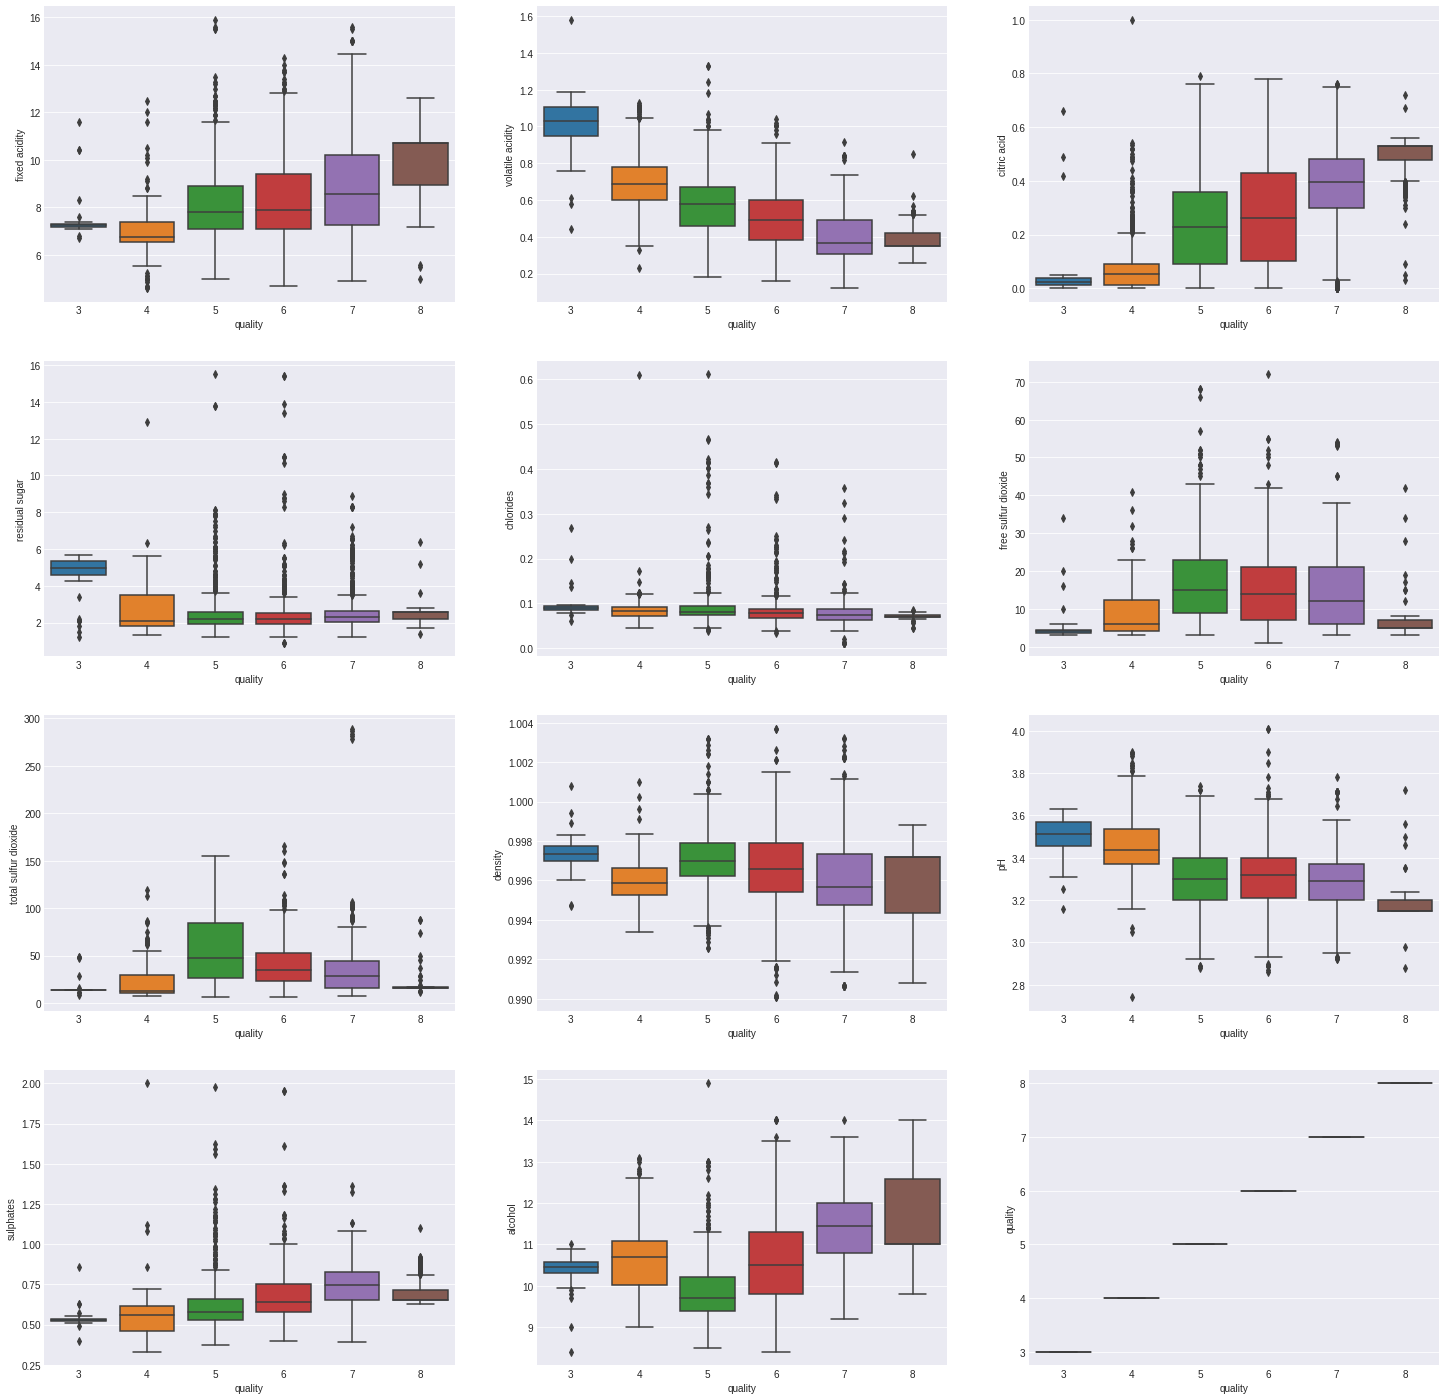

In [959]:
columns=df.columns
plt.style.use('seaborn-darkgrid')
_, axes = plt.subplots(4, 3, figsize=(25,25))
for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
  sns.boxplot(data=df,y=df[column], x=df['quality'], ax=axes[x][y])

In [960]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=101)

In [961]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [962]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import LabelPropagation
# GaussianProcessClassifier takes the longest time

models=[
    ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, 
    BaggingClassifier, GradientBoostingClassifier, XGBClassifier
    ,DecisionTreeClassifier, SVC, 
    MLPClassifier, LinearSVC, KNeighborsClassifier, 
    RidgeClassifier, LogisticRegression, LinearDiscriminantAnalysis, 
    AdaBoostClassifier, QuadraticDiscriminantAnalysis, GaussianNB,
    SGDClassifier, LabelPropagation]

accuracy = []
for model in models:
  m=model()
  m.fit(X_train,y_train) 
  y_test_pred = m.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_test_pred)*100)
  print('------------------------------------------------------------------------------------------------------------')
  print('------------------------------------------------------------------------------------------------------------') 
  print(model.__name__)
  print(classification_report(y_test, y_test_pred)) 
# Extracting the model name from the models
model_names=[]
for model in models:
  model_names.append(model.__name__)

# Combining the Model Name and Accuracy in a dataframe
# Here Model_Names and Accuracy Both are lists
# acc=pd.DataFrame(list(zip(model_names,accuracy)),columns=['Name','Accuracy'])
acc=pd.DataFrame({'Name':model_names, 'Accuracy':accuracy})

# Arranging the dataframe by the models with the highest accuracy to lowest accuracy
acc=acc.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
acc.index = acc.index + 1
acc

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
ExtraTreesClassifier
              precision    recall  f1-score   support

           3       1.00      0.98      0.99       188
           4       0.99      0.95      0.97       212
           5       0.76      0.82      0.79       200
           6       0.73      0.71      0.72       204
           7       0.92      0.94      0.93       234
           8       0.99      0.98      0.99       188

    accuracy                           0.90      1226
   macro avg       0.90      0.90      0.90      1226
weighted avg       0.90      0.90      0.90      1226

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------


,Name,Accuracy
1,ExtraTreesClassifier,89.559543
2,HistGradientBoostingClassifier,89.314845
3,RandomForestClassifier,89.233279
4,BaggingClassifier,86.704731
5,LabelPropagation,86.623165
6,GradientBoostingClassifier,85.889070
7,XGBClassifier,84.828711
8,DecisionTreeClassifier,83.034258
9,MLPClassifier,83.034258
10,KNeighborsClassifier,82.055465


<Figure size 2880x2880 with 0 Axes>

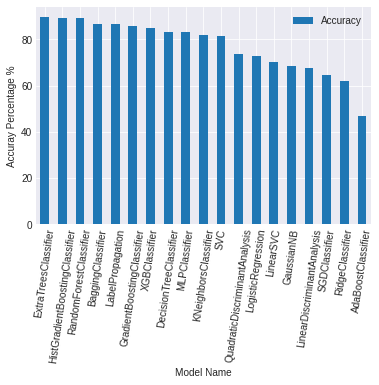

In [967]:
# Plotting the Accuracy of Different Models
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(40,40)
acc.plot(kind ='bar',x="Name",y='Accuracy')
plt.xlabel('Model Name')
plt.ylabel('Accuray Percentage %')
plt.xticks(rotation=82);
plt.show()

In [1004]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

models=[
        HistGradientBoostingClassifier(learning_rate=0.05, max_iter=50),
        ExtraTreesClassifier(n_estimators=450, criterion="gini"),
        RandomForestClassifier(n_estimators=450, criterion="entropy", max_depth=10)
        ]
accuracy = []
for model in models:
  m=model
  m.fit(X_train,y_train) 
  y_test_pred = m.predict(X_test)
  print(accuracy_score(y_test, y_test_pred)*100)
  print('------------------------------------------------------------------------------------------------------------')
  print('------------------------------------------------------------------------------------------------------------') 

87.52039151712887
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
88.98858075040783
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
88.33605220228385
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# mae = mean_absolute_error(y_test, y_test_pred)
# mse = mean_squ ared_error(y_test, y_test_pred)
# rmse = np.sqrt(mse)


In [ ]:
# PAIR PLOT 

# fig=plt.figure(figsize=(20,30))
# fig.set_size_inches(8,8)
# plt.style.use('seaborn-darkgrid')
# sns.pairplot(df, hue='quality')

In [ ]:
sns.boxplot(y=df1['chlorides'])

In [ ]:
# df.columns 
# df.columns.values
# df.columns.values.tolist()
# pd.DataFrame(df.columns)

In [ ]:
df.head()

In [ ]:
# Converting Numeric Column with repeating value to string to get a scatter plot
# plt.scatter(df['Year'].astype(str),y)
# print(sns.scatterplot(x=df['State_Name'],y=y))
# plt.figure(figsize=(15,10),dpi=300)
# plt.xticks(rotation=90)
# plt.line(x=df['sulphates'],y=df['quality'])
# plt.scatter(x=df['chlorides'],y=df['quality'])
# sns.lineplot(x=df['sulphates'],y=df['quality'])
# plt.show()

In [ ]:
# df['quality'].unique() 
# df.corr()

# # Returns the columns with just numeric columns
# df.select_dtypes(include=['number'])
# g=sns.PairGrid(df)
# g.map(plt.scatter)
# # Balanced Dataset or not

In [ ]:
# Plotting the Accuracy of Different Models
# fig=plt.figure(figsize=(20,30))
# fig.set_size_inches(40,40)
# acc.plot(kind ='bar',x="Name",y='Accuracy')
# plt.xlabel('Model Name')
# plt.ylabel('Accuray Percentage %')
# plt.xticks(rotation=82);
# plt.show()

In [ ]:
# df.info()
# df['quality'].plot(kind='kde')
# fig = plt.gcf()
# fig.set_size_inches(15, 10)
# df=df[df['total sulfur dioxide']<155]
# sns.scatterplot(x=df['total sulfur dioxide'],y=df['quality'],c=df['quality'],alpha=0.5)
# plt.legend()

In [ ]:
# How to Drop Multiple rows
# Find the rows, 
# Save them, 
# Drop them using their index
# dr=df[(df['total sulfur dioxide']>100) & (df['quality']==4)]
# df=df.drop(dr.index,axis=0)

In [ ]:
# def outliers(str):
#  p75=df['residual sugar'].quantile(0.75)
#  p25=df['residual sugar'].quantile(0.25)
#  iqr=p75-p25
#  ul=p75+1.5*iqr
#  ll=p25-1.5*iqr
#  df=df[(df['residual sugar']<ul) & (df['residual sugar']>ll)]

In [ ]:
# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# pd.DataFrame(get_top_abs_correlations(df, 10))

In [ ]:
# plt.style.use('seaborn-whitegrid')
# plt.style.use('dark_background')
# _, axes = plt.subplots(4, 3, figsize=(25,25))
# for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
#   sns.boxplot(y=df[column], x=df['quality'],ax=axes[x][y])

In [ ]:
df1=df.copy()
df2=df.copy()
df3=df.copy()


In [ ]:
sns.boxplot(y=df['residual sugar'], x=df['quality'])

In [ ]:
def outliers(column):
  fig=plt.figure(figsize=(20,30))
  fig.set_size_inches(10,10)
  p75=column.quantile(0.75)
  p25=column.quantile(0.25)
  iqr=p75-p25
  ul=p75+3*iqr
  ll=p25-3*iqr
  df1=df1[(column>ll) & (column<ul)]
  sns.boxplot(y=column)
  plt.show()

In [ ]:
df.head()

In [ ]:
sns.boxplot(y=df['residual sugar'])

In [ ]:
column=df['residual sugar']
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(10,10)
p75=column.quantile(0.75)
p25=column.quantile(0.25)
iqr=p75-p25
ul=p75+1.5*iqr
ll=p25-1.5*iqr
df1=df1[(column<ll) & (column>ul)]
sns.boxplot(y=column)
plt.show()